# k-Nearest Neighbors classifier
Statistical learning refers to a collection of mathematical and computation tools to understand data.
In what is often called supervised learning,the goal is to estimate or predict an output based on one or more inputs.
The inputs have many names, like predictors, independent variables,features, and variables being called common.
The output or outputs are often called response variables,or dependent variables.
If the response is quantitative-- say, a number that measures weight or height,we call these problems regression problems.
If the response is qualitative-- say, yes or no, or blue or green,we call these problems classification problems.
This case study deals with one specific approach to classification.
The goal is to set up a classifier such that when it's presented with a new observation whose category is not known,
it will attempt to assign that observation to a category, or a class, based on the observations for which it does know the true category.
This specific method is known as the k-Nearest Neighbors classifier,
or kNN for short.


In [23]:
import numpy as np
def distance(p1, p2):
    """Find the Euclidean distance between two points """
    return np.sqrt(np.sum(np.power(p1 - p2, 2)))

p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1, p2)
    

4.242640687119285

In [24]:

import random 

def majority_vote(votes):
    """Return the most comman element in votes"""
    vote_count = {}
    for vote in votes:
        if vote in vote_count:
            vote_count[vote] += 1
        else:
            vote_count[vote] = 1
    
    winner = []
    max_count = max(vote_count.values())
    for vote, count in vote_count.items():
        if max_count == count:
            winner.append(vote)
    return random.choice(winner)

majority_vote([1,2,3,4,5,2,1,2,5,7,2,2])
    
    

2

In [25]:
import scipy.stats as ss 

def majority_vote_short(votes):
    """Return the most comman element in votes"""
    mode , count = ss.mstats.mode(votes)
    return mode
majority_vote_short([1,2,3,4,5,2,1,2,5,7,2,2])

array([2.])

In [26]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])
outcomes = np.array([0,0,0,0,1,1,1,1,1])

print(points[:,0])
print(points[:,1])

[1 1 1 2 2 2 3 3 3]
[1 2 3 1 2 3 1 2 3]


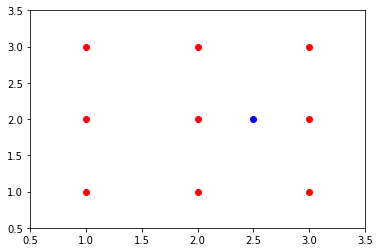

In [27]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0], p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])
plt.show()

In [28]:
def find_nearest_neighbors(p, points, k = 5):
    """find the k nearest neighbors to point p and return there index"""
    distances = np.zeros(points.shape[0])
    for i in range(len(points)):
        distances[i] = distance(p,points[i])
    ind = np.argsort(distances) # return the sorted "index" of the array not the value
    return ind[:k]
        
    

In [29]:
def knn_perdict(p, points, outcome, k = 5):
    """x"""
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcome[ind])
    

In [30]:
def generate_synthetic_data(n = 50):
    """Create two sets of points from bivariate normal distributions."""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)) , ss.norm(1,1).rvs((n,2))) , axis = 0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return (points, outcomes)



In [31]:
xs = np.arange(0, 8, 2)
ys = np.arange(0, 8, 1)
print(xs)
print(ys)    
xx,yy = np.meshgrid(xs, ys)
print(xx)    
print(yy) 

[0 2 4 6]
[0 1 2 3 4 5 6 7]
[[0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]
 [5 5 5 5]
 [6 6 6 6]
 [7 7 7 7]]


In [32]:
def make_perdiction_grid(perdiction, outcames, limit, h, k):
    (x_min, x_max, y_min, y_max) = limit
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx,yy = np.meshgrid(xs, ys)
    
    perdiction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            perdiction_grid[j,i] = knn_perdict(p, perdiction, outcames, k )
    return xx, yy, perdiction_grid

In [33]:
def plot_prediction_grid (xx, yy, prediction_grid, predictors, outcomes):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.show()

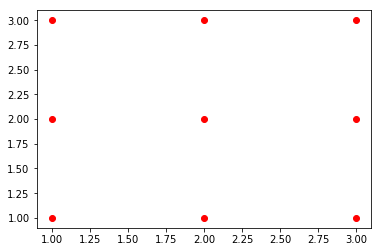

In [34]:
(perdictor, outcomes) = generate_synthetic_data()
n = 20
plt.figure()
plt.plot(points[:n,0], points[:n, 1],"ro")
plt.plot(points[n:,0], points[n:, 1],"bo")
plt.show()

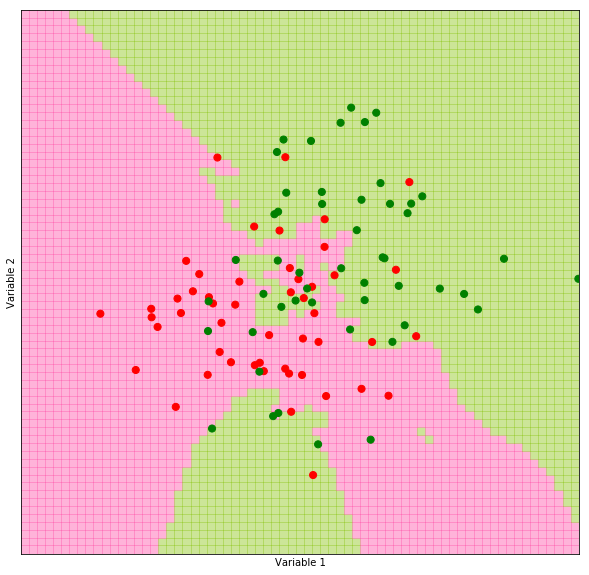

In [38]:
k = 5; limits = (-3,4,-3,4); h = 0.1;
(xx, yy, perdiction_grid) = make_perdiction_grid(perdictor, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, perdiction_grid, perdictor, outcomes)



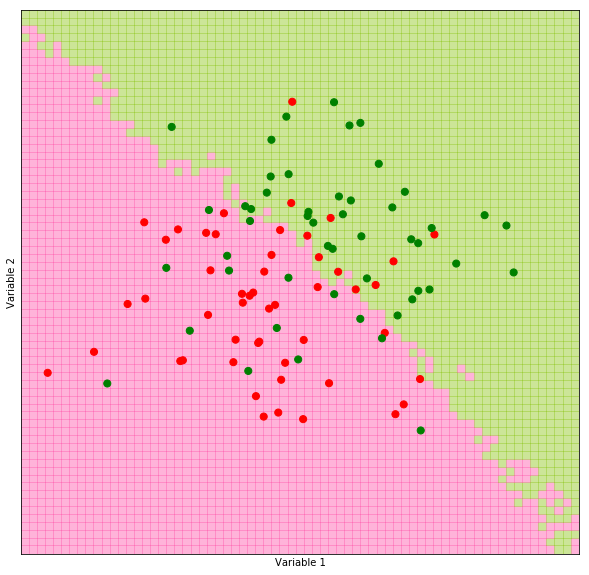

In [14]:
k = 50; limits = (-3,4,-3,4); h = 0.1;
(xx, yy, perdiction_grid) = make_perdiction_grid(perdictor, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, perdiction_grid, perdictor, outcomes)

We'll be applying both the SciKitLearn and our homemade classifier to a classic data set created by Ron Fisher in 1933.
It consists of 150 different iris flowers.50 from each of three different species.
For each flower, we have the following covariates: sepal length, sepal width,petal length, and petal width.
Let's first import some data sets. 

In [15]:
from sklearn import datasets

iris = datasets.load_iris()
iris["data"] #shape (150, 4) 


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

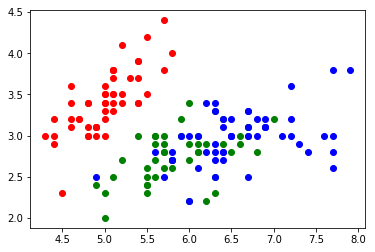

In [16]:
predictors = iris.data[:,0:2]
outcomes = iris.target

plt.plot(predictors[outcomes == 0][:,0],predictors[outcomes == 0][:,1], "ro")#if the outcome in the predictors index == 0
plt.plot(predictors[outcomes == 1][:,0],predictors[outcomes == 1][:,1], "go")
plt.plot(predictors[outcomes == 2][:,0],predictors[outcomes == 2][:,1], "bo")

plt.show()


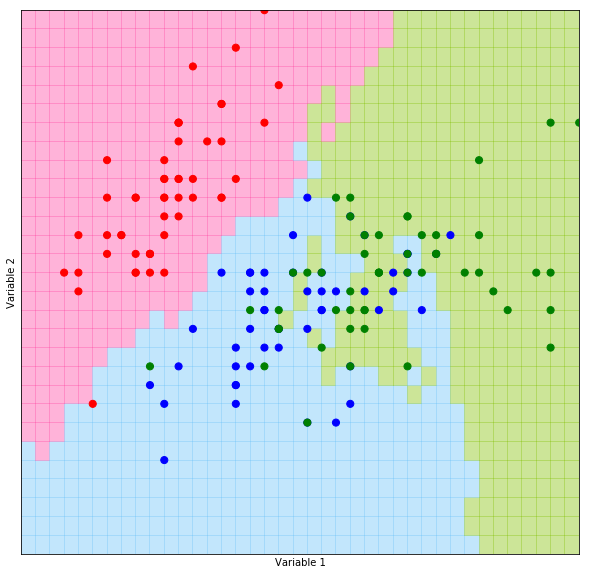

In [17]:
k = 5; limits = (4,8,1.5,4.5); h = 0.1;
(xx, yy, perdiction_grid) = make_perdiction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, perdiction_grid, predictors, outcomes)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
kn_prediction = knn.predict(predictors)
kn_prediction.shape

(150,)

In [19]:
my_prediction = np.array([knn_perdict(p, predictors, outcomes,  5) for p in predictors])
my_prediction.shape

(150,)

How often do the sk_predictions predictions agree with my predictions.

In [20]:
100 * np.mean(my_prediction == kn_prediction )

96.0

How frequently do my predictions and SciKit predictions agree with the actual observed outcomes.

In [21]:
100 * np.mean(my_prediction == outcomes)

84.66666666666667

In [22]:
100 * np.mean(kn_prediction == outcomes)

83.33333333333334